# Connected Car Challenge

This notebook deals with the analysis of the data desigbed for the _Connected Car Challenge_. You can obtain the data from [here].

We first import the neccessary packages:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

Then we read the whole data :

In [2]:
dt = pd.read_csv ("candump-2017-06-20_022638" , sep = " " , names = ['a' , 'b' , 'c'])

In [4]:
dt.head()

,a,b,c
0,(1497925598.604522),can0,233#2F0FFF0C00D10100
1,(1497925598.604710),can0,223#890513004A000081
2,(1497925598.606356),can0,00E#20E3200004FF40E2
3,(1497925598.606391),can0,228#40C040A1
4,(1497925598.608609),can0,408#20


In [236]:
len(dt)

15833917

As you can see the data is not meaningful yet. We have to clean it and convert it to a readable ones. Here how we did it here :

In [237]:
dt2 = dt.iloc[:,:]
data = dt2.copy()

data['id']     =  data['c'].apply(lambda s : s[:3])
data['time']   =  data['a'].apply(lambda s : (float (s[1:-1]) - 1497925598.604522))
data['value'] =  data['c'].apply(lambda s : int (s[4:],16))

data.drop(['a', 'b' , 'c'], axis=1 , inplace = True)
data.head()

,id,time,value
0,233,0.000000,3391209471451660544
1,223,0.000188,9873318650042122369
2,00E,0.001834,2369773013382938850
3,228,0.001869,1086341281
4,408,0.004087,32


The `id` column corresponds to the ids of the sensors the examinator and we have to seperate the data into different groups by the help of their ids. Then we habe to drop the ids that have no information in their values. We dropped the ones that are (alsmot) constant.

In [238]:
ids = np.unique( data.id )
print ("The number of uniques in ids are " + str (len(ids)) )

grouped = data.groupby (['id'])
idsStd = grouped ['value'].std()
badids = idsStd [idsStd < 0.01].index

badindex = list(grouped.get_group(badids[0]).index)
for i in range (len(badids)-1):
    badindex = badindex + list(grouped.get_group(badids[i+1]).index)
    
dataCleaned    = data.drop(badindex)
grouped = dataCleaned.groupby (['id'])


The number of uniques in ids are 268


As you can see below, quite half of the sensors do not provide us an information.

In [241]:
len(dataCleaned) , len(data) , len(ids) , len(badids)

(14895639, 15833917, 268, 105)

We will plot in next part the corresponding evolution of signal for each of the sensors. There are a few things we have to notice here:

1. The signals do not start at the same time. Some of them are registered from time 0 while there are the ones which start at the 350 second (in 10 minutes).

2. Some of the signals are just a slight shift (in time) of each other.

3. There are a very highly oscilating signals. We should put a low-pass filter to take a better picture about their evolution.

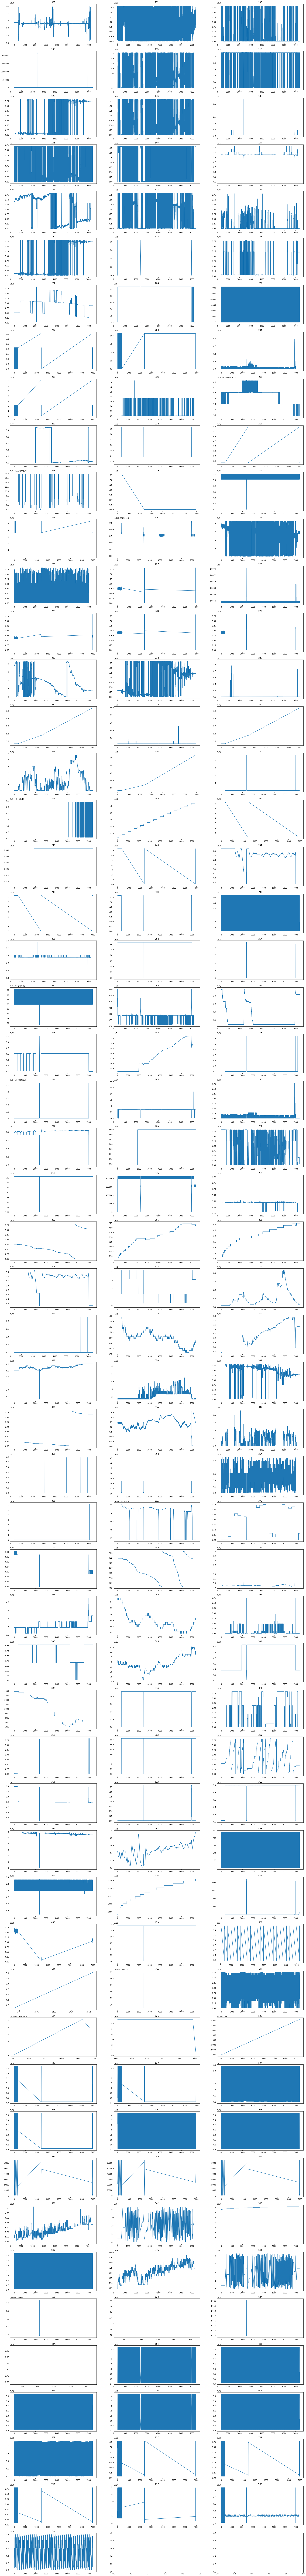

In [247]:
ncols=3
nrows = int(np.ceil(grouped.ngroups/ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30,90*ncols))

for (key, ax) in zip(grouped.groups.keys(), axes.flatten()):
    x , y = grouped.get_group(key)['time'] , grouped.get_group(key)['value']
    ax.plot (np.array(x) , np.array(y))
    ax.set_title(key)

plt.savefig('datas_read.jpg')
# plt.show()

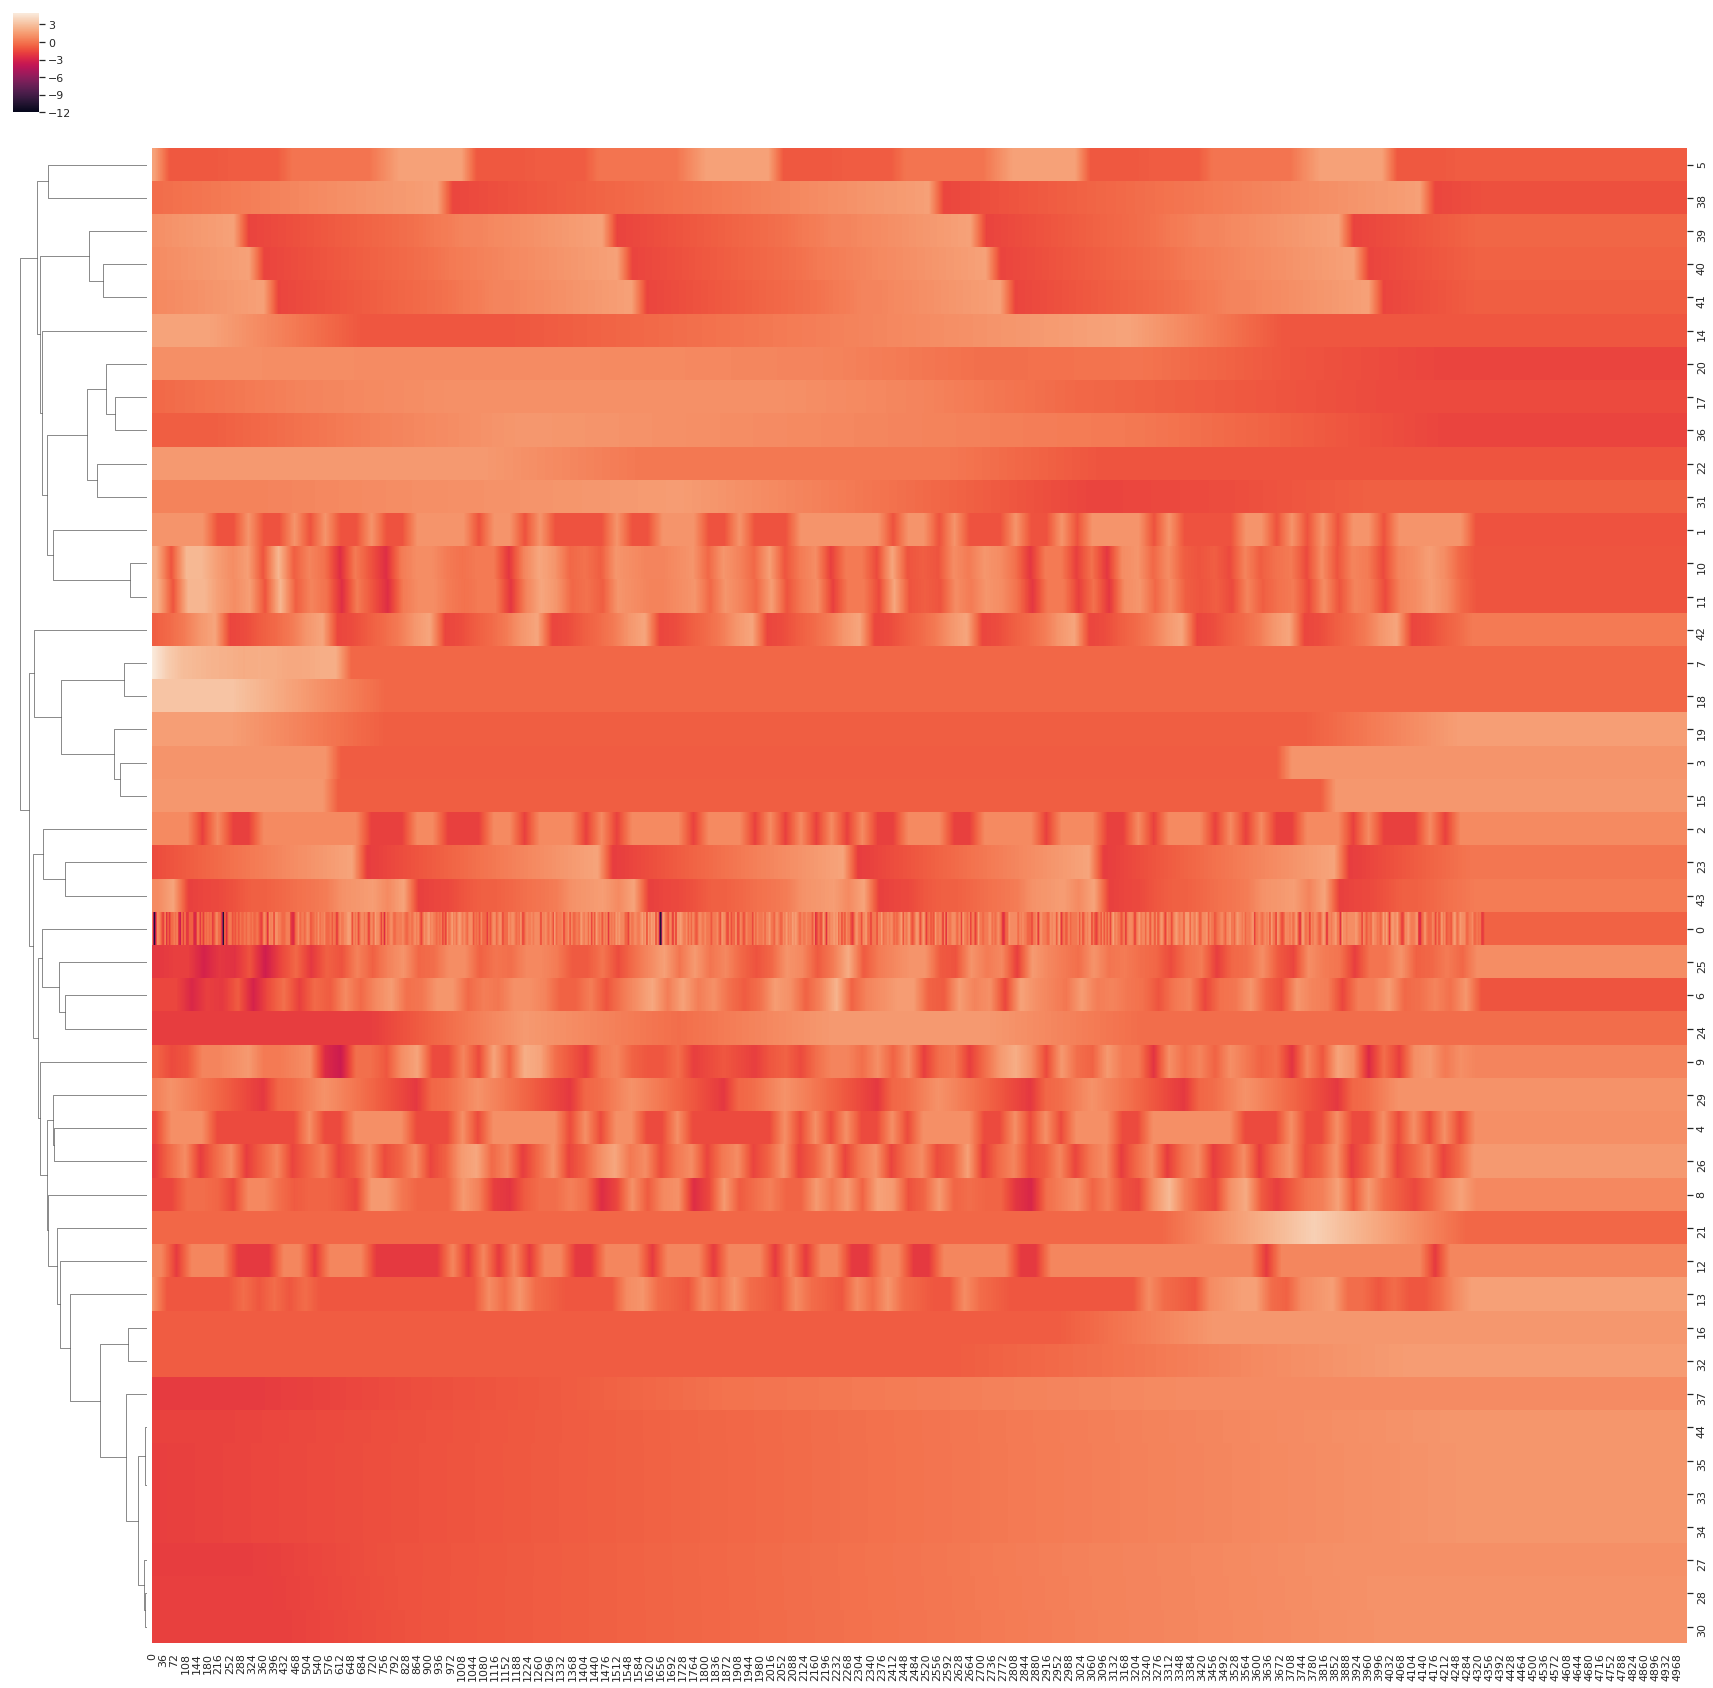

In [148]:
nsignals = len(mdict)
new_times = np.linspace(0, 10, 5000)

signals = np.empty((nsignals, 5000))
for isignal, signal in enumerate(mdict.values()):
    signals[isignal] = np.interp(new_times, signal[:, 0], signal[:, 1])
    
signals = (signals - signals.mean(axis=1)[:, None])/(signals.std(axis=1)[:, None]  + 1e-10)
# plt.figure(figsize=(20, 20))
# plt.imshow(signals, aspect='auto')

import seaborn as sns; sns.set(color_codes=True)
g = sns.clustermap(signals, col_cluster=False, figsize=(30, 30))

plt.savefig('clustering.jpg')